In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed

In [223]:
df = pd.read_csv('DATA/insurance2.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [224]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

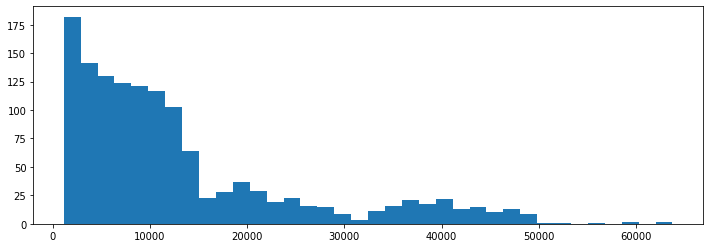

In [225]:
plt.figure(figsize=(12,4))
df['charges'].hist(bins=36)
plt.grid()
plt.show()

In [226]:
import seaborn as sns

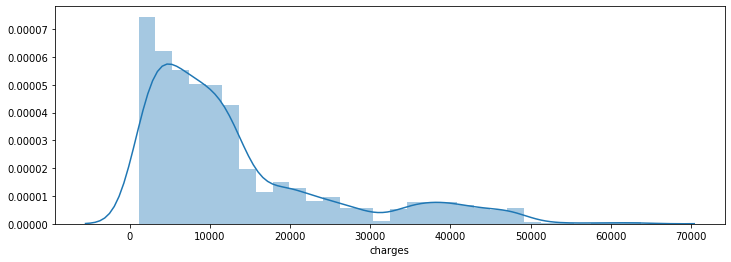

In [227]:
plt.figure(figsize=(12,4))
sns.distplot(df["charges"])
plt.show()

In [228]:
df[df['insuranceclaim']==1]['charges'].head()

0     16884.9240
1      1725.5523
4      3866.8552
6      8240.5896
10     2721.3208
Name: charges, dtype: float64

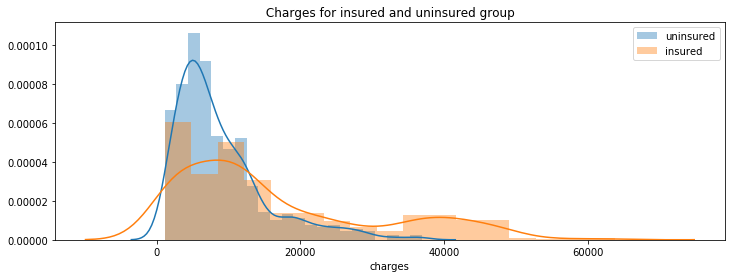

In [229]:
plt.figure(figsize=(12,4))
sns.distplot(df[df['insuranceclaim']==0]['charges'], label='uninsured')
sns.distplot(df[df['insuranceclaim']==1]['charges'], label='insured')
plt.title(" Charges for insured and uninsured group ")
plt.legend()
plt.show()

# Compare two groups statistically

In [230]:
df[df['insuranceclaim']==1]['charges'].mean(), df[df['insuranceclaim']==0]['charges'].mean()

(16423.928276537663, 8821.421892306294)

In [231]:
df[df['insuranceclaim']==1]['charges'].std(), df[df['insuranceclaim']==0]['charges'].std()

(14045.928418802127, 6446.510126811736)

In [232]:
[t,p] = stats.ttest_ind(df[df['insuranceclaim']==1]['charges'], df[df['insuranceclaim']==0]['charges'], equal_var=True)
t, p

(11.893299030876712, 4.461230231620717e-31)

In [233]:
s_1 = df[df['insuranceclaim']==1]['charges'].std()
n_1 = len(df[df['insuranceclaim']==1]['charges'])
s_1, s_1

(14045.928418802127, 197288105.14611322)

In [234]:
s_0 = df[df['insuranceclaim']==0]['charges'].std()
n_0 = len(df[df['insuranceclaim']==0]['charges'])
s_0, n_0

(6446.510126811736, 555)

In [235]:
s_p = np.sqrt( ((n_1-1)*s_1**2+(n_0-1)*s_0**2)/(n_1+n_0-2) )
s_p

11520.034268775256

In [236]:
t_p = ( df[df['insuranceclaim']==1]['charges'].mean() - df[df['insuranceclaim']==0]['charges'].mean() )/(s_p*np.sqrt(1/n_0+1/n_1))

t_p, t

(11.89329903087671, 11.893299030876712)

In [237]:
print(" p = p_value = 2*(1 - t.cdf(t_stat, df=total_dof)) " )

 p = p_value = 2*(1 - t.cdf(t_stat, df=total_dof)) 


In [238]:
p_1 = 0
p_1

0

# Z score

In [239]:
x = np.sort(df[df['insuranceclaim']==1]['charges'])
x_bar = np.mean(x)
x_sigma = np.std(x)
x_bar, x_sigma

(16423.928276537674, 14036.956250260417)

In [240]:
x_pdf = norm.pdf(x, loc=x_bar, scale=x_sigma)
c_int = 96
conf_int = np.percentile(x, [(100-c_int)/2,c_int+(100-c_int)/2])
conf_int[0]

x_zscore = stats.zscore(x)

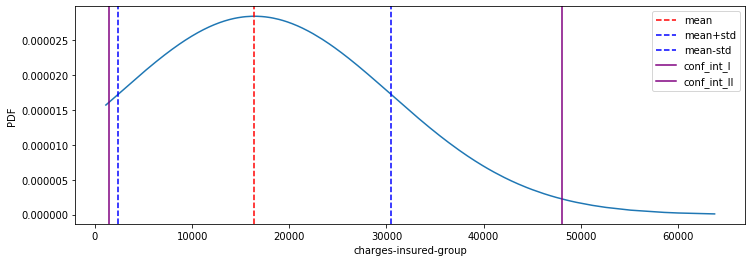

In [241]:
plt.figure(figsize=(12,4))
plt.plot(x, x_pdf)
plt.axvline(x_bar, color='red', linestyle='--', label='mean')
plt.axvline(x_bar+x_sigma, color='blue', linestyle='--', label='mean+std')
plt.axvline(x_bar-x_sigma, color='blue', linestyle='--', label='mean-std')

plt.axvline(conf_int[0], color='purple', linestyle='-', label='conf_int_I')
plt.axvline(conf_int[1], color='purple', linestyle='-', label='conf_int_II')

plt.xlabel('charges-insured-group')
plt.ylabel('PDF')

plt.legend()
plt.show()

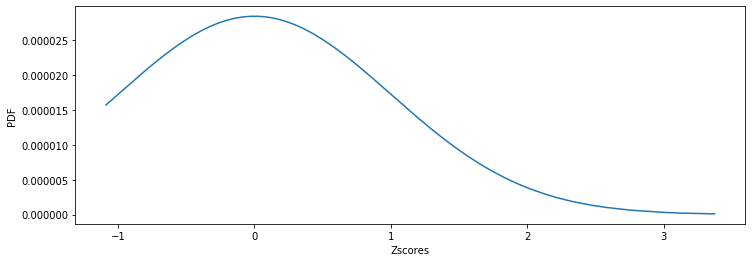

In [242]:
plt.figure(figsize=(12,4))
x_zscore = stats.zscore(x)
plt.plot(x_zscore, x_pdf)

plt.xlabel('Zscores')
plt.ylabel('PDF')
plt.show()